<div>
    <img src="emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Python BootCamp </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2023, Paris | © Saeed VARASTEH [RP] | Jean SAVINIEN
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#d3dbd3; text-align:left">
    <span style="font-weight:bold; color:#476b47">
        <h4 style="padding:15px;"> FINAL EXAM </h4>
    </span>
</div>
<div style="text-align:right">Dec 15th, 2023</div>

<hr style="color:gray;"/>

__Your Name:__Shujuan Zhang/Emily Zhang  Double-click here and write your name.

<hr style="color:gray;"/>

<h5 style="color:crimson">Notes:</h5>

<ul>
    <li>Do not forget to enter <b>your name</b> above.</li>
    <li>Do not forget to <b>comment your codes</b> as much as you can.</li>
    <li>Do not try to search directly for the answers online. However, if you do, which is not recommended, comment on the code and explain the solution and <b>cite the url</b> that you picked the code from.</li>
    <li>Do not share your codes!</li>
</ul>
<br/>

<div class="alert-warning">
    Remember that the use of <b>generative models</b> is extremely <u>forbidden</u>. However, if you do not know something, you can simply search for it on Google.
</div>

<h5 style="color:gray">Good Luck!</h5>

---

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="color:gray; background-color:#eeeeee">
    Credit risk assessment
</div>


You are given a file named __risk.csv__.

In this file, you have information about several individuals, their loan status, and their credit scores.

Here are the columns descriptions:

- __person_age__ 	Person age
- __person_income__ 	Person annual income
- __person_home_ownership__ 	Person home ownership
- __person_emp_length__ 	Employment length (in years)
- __loan_intent__ 	Loan intention
- __loan_amnt__ 	Loan total amount
- __loan_int_rate__ 	Loan interest rate
- __loan_status__ 	Loan status (0 is non default 1 is default)
- __loan_percent_income__ 	Percent income
- __cb_person_default_on_file__ 	Historical default
- __cb_preson_cred_hist_length__ 	Credit history length

---

<div style="color:gray; background-color:#eeeeee">
PART ONE
</div>


__Q1__ Read the file into a Pandas `DataFrame` and print the first 3 rows of data. Name your dataframe as __df__.

In [2]:
# your code
df = pd.read_csv(r"C:\Users\emily\Desktop\DMDS Final Exam Dec 2023\DMDS Final Exam Dec 2023\risks.csv")
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3


__Q2__ Check the dimensions. How many rows and columns do you have in the data set? 

In [79]:
# your code
#32581 column and 11 rows
df.shape


(32581, 11)

__Q3__ Check for missing values and delete the rows with missing values if you have any.

In [7]:
# your code
#check the missing value
df.isnull()
# delete the missing value(there are missing value)
df.dropna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


__Q4__ What are the minimum and maximum values of __person_income__ column?

In [8]:
# your code
income_max=df['person_income'].max()
income_max

6000000

__Q5__ What are the unique values in the __loan_intent__ column?

In [12]:
# your code
loan_intent_unique=df['loan_intent'].unique()
loan_intent_unique

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

__Q6__ How many samples do we have in the dataset for each __loan_intent__ category?

In [13]:
# your code
loan_intent_count=df['loan_intent'].value_counts() 
loan_intent_count

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

__Q7__ Select all rows where the __loan_intent__ is "EDUCATION" or "MEDICAL". Name this dataframe as __df_new__. 

In [14]:
# your code
df_new = df[(df['loan_intent'] == 'EDUCATION') | (df['loan_intent'] == 'MEDICAL')]
df_new 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N,3
...,...,...,...,...,...,...,...,...,...,...,...
32561,54,129000,MORTGAGE,6.0,EDUCATION,9000,11.49,1,0.07,N,24
32563,52,71520,RENT,0.0,EDUCATION,7000,16.82,1,0.10,Y,24
32565,57,40000,RENT,1.0,MEDICAL,15000,8.90,1,0.38,N,21
32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20


__Q8__ Create a frequency table with the __loan_intent__ (EDUCATION, MEDICAL) in the rows and __loan_stats__ in the columns. Use the __df_new__ dataframe.

<span style="color:crimson">Hint:</span> You can use the `pd.crosstab()` function for this.

In [24]:
# your code
frequency_table= pd.crosstab(df_new['loan_intent'], df_new['loan_status'])

frequency_table

loan_status,0,1
loan_intent,,
EDUCATION,5342,1111
MEDICAL,4450,1621


__Q9__ What are the loan default percentages for the two __loan_intent__ categories in __df_new__?

In [38]:
# your code

#count each categories amount
loan_intent_new_count = df_new['loan_intent'].value_counts()
#count education amount
loan_intent_education_count = loan_intent_new_count.get('EDUCATION', 0)
#count medical amount
loan_intent_medical_count = loan_intent_new_count.get('MEDICAL', 0)
#count the total loan_intent
loan_intent_total_count = df_new['loan_intent'].count()

# Calculate percentage
education_percentage= (loan_intent_education_count / loan_intent_total_count) * 100
medical_percentage=(loan_intent_medical_count/ loan_intent_total_count) * 100
print("Education percentage is:",education_percentage)
print("Medical percentage:", medical_percentage)




Education percentage is: 51.52507186202491
Medical percentage: 48.474928137975084


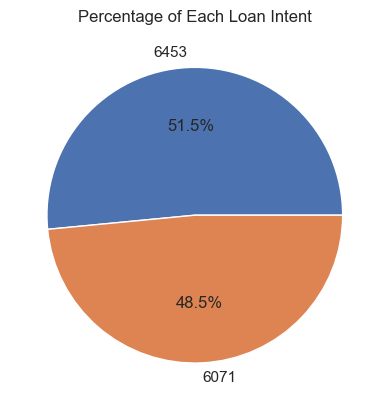

In [83]:
# This is also the answer for Q9, just want to try pie chart which is much more visualized.
# Count the each category of loan_intent
loan_intent_counts = df_new['loan_intent'].value_counts()
# Create a pie chart
plt.pie(loan_intent_counts, labels=loan_intent_counts, autopct='%1.1f%%')
plt.title('Percentage of Each Loan Intent')
plt.show()


__Q10__  Keep the following columns: 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_status' and drop the rest from the __df__.

In [42]:
# your code
df_column=['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_status']
df_drop=df[df_column]
df_drop.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_status
0,22,59000,RENT,123.0,PERSONAL,35000,1
1,21,9600,OWN,5.0,EDUCATION,1000,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,1
3,23,65500,RENT,4.0,MEDICAL,35000,1
4,24,54400,RENT,8.0,MEDICAL,35000,1


__Q11__ What is the average __age__ of the people in the dataset?

In [43]:
# your code
average_age=df_drop['person_age'].mean()
average_age

27.73459992019889

__Q12__ What are the average incomes for each home ownership category? 

In [45]:
# your code
# Groupby the person_home_ownership and get mean value of person_income
average_income_each_category=df_drop.groupby('person_home_ownership')['person_income'].mean()

average_income_each_category

person_home_ownership
MORTGAGE    81127.121690
OTHER       76387.803738
OWN         57834.812693
RENT        54997.747963
Name: person_income, dtype: float64

__Q13__ What is the number of loan defaults for each homeownership category and for each loan intent type? 

Here is the expected output:

<div>
<img style="width:70%" src="tbl1.png" />
</div>

<span style="color:crimson">Hint:</span> You can use `pivot_table()` for this question.

In [78]:
# your code
# Pivot table function was checked on line:https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

pivot_table = pd.pivot_table(df,values='loan_amnt',index=['person_home_ownership'],columns='loan_intent',aggfunc='count',fill_value=0)

pivot_table 

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
person_home_ownership,,,,,,
MORTGAGE,2312,2627,1741,2190,2340,2234
OTHER,17,17,12,17,18,26
OWN,72,528,318,434,446,786
RENT,2811,3281,1534,3430,2717,2673


__Analyzing the output__ Is there a pattern between homeownership status, intent to borrow, and loan defaults?

In [ ]:
# Explain in words
DEBTCONSOLIDATION,EDUCATION,MEDICAL,PERSONAL,VENTURE are all like to rent. Only HOMEIMPROVEMENT:like to mortgage

__Q14__ Display the distribution of __ages__ using a box plot.

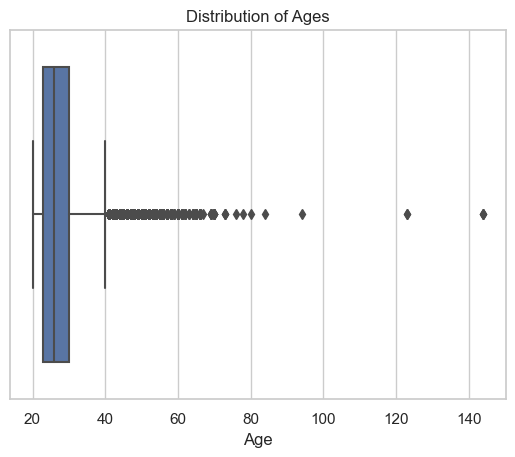

In [56]:
# your code

# Create a box plot for the distribution of ages
sns.boxplot(x=df_drop['person_age'])
# Create a plot title 
plt.title('Distribution of Ages')

plt.xlabel('Age')
plt.show()


__Q15__ Compare the box plots of __age__ distributions across __person_home_ownership__ status.

Create a plot like this:

<div>
<img style="width:40%" src="homeowners.png" />
</div>

<span style="color:crimson">Hint:</span> I used seborn `boxplot()` function.

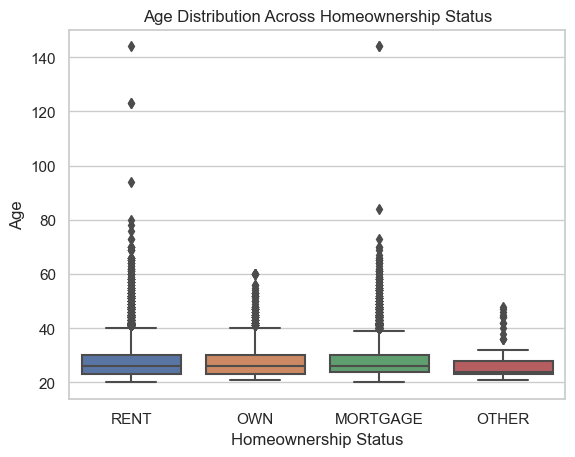

In [57]:
# your code
# Create a box plot and name the xlabel and ylabel and plot title
sns.boxplot(x='person_home_ownership', y='person_age', data=df_drop)
plt.title('Age Distribution Across Homeownership Status')
plt.xlabel('Homeownership Status')
plt.ylabel('Age')
plt.show()

---

<div style="color:gray; background-color:#eeeeee">
PART TWO
</div>

__Q16__ Get all the values of the __person_income__ column into a Python list. Name this list as __incomes__.

In [63]:
# your code
# Convert the column to list
incomes = df['person_income'].tolist()

incomes

[59000,
 9600,
 9600,
 65500,
 54400,
 9900,
 77100,
 78956,
 83000,
 10000,
 85000,
 10000,
 95000,
 108160,
 115000,
 500000,
 120000,
 92111,
 113000,
 10800,
 162500,
 137000,
 65000,
 10980,
 80000,
 67746,
 11000,
 11000,
 65000,
 11389,
 11520,
 120000,
 95000,
 306000,
 300000,
 12000,
 48000,
 64000,
 75000,
 71500,
 62050,
 12000,
 300000,
 300000,
 300000,
 300000,
 300000,
 80690,
 66300,
 89028,
 78000,
 78000,
 92004,
 97000,
 120000,
 280000,
 277104,
 277000,
 128000,
 12000,
 131000,
 275000,
 263000,
 221850,
 70000,
 12000,
 260000,
 259000,
 255000,
 250000,
 12000,
 56950,
 12000,
 65000,
 85000,
 12000,
 88000,
 12000,
 12000,
 83004,
 250000,
 250000,
 100000,
 110000,
 12000,
 108000,
 151200,
 69000,
 12000,
 70000,
 240000,
 73200,
 83000,
 73399,
 62500,
 120000,
 12360,
 60000,
 234000,
 234000,
 234000,
 221004,
 232500,
 230000,
 83000,
 12600,
 12600,
 42500,
 41000,
 12816,
 12960,
 226000,
 225000,
 213000,
 225000,
 12960,
 12996,
 42000,
 48000,
 1299

__Q17__ Scale all of the values in this list so that they are between 0 and 1.

In [77]:
# your code

from sklearn.preprocessing import MinMaxScaler

# Assuming incomes is your list
incomes = df['person_income'].tolist()  

# Reshape the list to be a 2D array
incomes_2d = [[val] for val in incomes]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
incomes_scaled = scaler.fit_transform(incomes_2d)

# Convert the scaled array back to a 1D list
incomes_scaled = [val[0] for val in incomes_scaled]

print("Scaled Incomes:", incomes_scaled)


Scaled Incomes: [0.009172781854569715, 0.0009339559706470981, 0.0009339559706470981, 0.010256837891927953, 0.008405603735823882, 0.0009839893262174784, 0.012191460973982656, 0.01250100066711141, 0.013175450300200134, 0.0010006671114076052, 0.01350900600400267, 0.0010006671114076052, 0.015176784523015345, 0.017371581054036026, 0.018512341561040695, 0.08272181454302868, 0.019346230820547032, 0.014694963308872582, 0.01817878585723816, 0.0011340893929286191, 0.026434289526350904, 0.02218145430286858, 0.010173448965977317, 0.0011641094062708472, 0.012675116744496333, 0.010631420947298197, 0.0011674449633088727, 0.0011674449633088727, 0.010173448965977317, 0.0012323215476984656, 0.0012541694462975318, 0.019346230820547032, 0.015176784523015345, 0.05036691127418279, 0.04936624416277518, 0.0013342228152101402, 0.007338225483655771, 0.010006671114076052, 0.011841227484989992, 0.011257505003335559, 0.00968145430286858, 0.0013342228152101402, 0.04936624416277518, 0.04936624416277518, 0.0493662441

__Q18__ Get all the values of the __person_emp_length__ column into a Python list. Name this list as __emps__.

In [62]:
# your code
# Create a list for person_emp_length
emps = df['person_emp_length'].tolist()
emps 

[123.0,
 5.0,
 1.0,
 4.0,
 8.0,
 2.0,
 8.0,
 5.0,
 8.0,
 6.0,
 6.0,
 2.0,
 2.0,
 4.0,
 2.0,
 7.0,
 0.0,
 7.0,
 8.0,
 8.0,
 2.0,
 9.0,
 4.0,
 0.0,
 3.0,
 8.0,
 3.0,
 0.0,
 6.0,
 5.0,
 5.0,
 2.0,
 7.0,
 2.0,
 10.0,
 5.0,
 1.0,
 8.0,
 4.0,
 3.0,
 6.0,
 4.0,
 10.0,
 1.0,
 9.0,
 0.0,
 9.0,
 8.0,
 4.0,
 0.0,
 4.0,
 7.0,
 6.0,
 7.0,
 9.0,
 4.0,
 0.0,
 3.0,
 9.0,
 2.0,
 0.0,
 6.0,
 0.0,
 9.0,
 6.0,
 7.0,
 10.0,
 9.0,
 9.0,
 2.0,
 0.0,
 6.0,
 6.0,
 2.0,
 2.0,
 2.0,
 6.0,
 0.0,
 6.0,
 0.0,
 2.0,
 4.0,
 5.0,
 10.0,
 0.0,
 6.0,
 7.0,
 2.0,
 5.0,
 4.0,
 6.0,
 5.0,
 5.0,
 0.0,
 7.0,
 1.0,
 2.0,
 0.0,
 3.0,
 8.0,
 10.0,
 6.0,
 0.0,
 5.0,
 7.0,
 nan,
 3.0,
 3.0,
 2.0,
 0.0,
 1.0,
 4.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 6.0,
 2.0,
 1.0,
 1.0,
 1.0,
 4.0,
 0.0,
 1.0,
 8.0,
 2.0,
 5.0,
 1.0,
 4.0,
 2.0,
 1.0,
 0.0,
 3.0,
 2.0,
 3.0,
 1.0,
 5.0,
 2.0,
 10.0,
 7.0,
 11.0,
 1.0,
 2.0,
 5.0,
 0.0,
 1.0,
 2.0,
 0.0,
 6.0,
 10.0,
 5.0,
 6.0,
 4.0,
 4.0,
 4.0,
 8.0,
 4.0,
 8.0,
 5.0,
 2.0,
 0.0,
 2.0,
 7.0,
 2.0,


__Q19__ Create a scatter plot of the values in the __emps__ list against the values in the __incomes__ list.

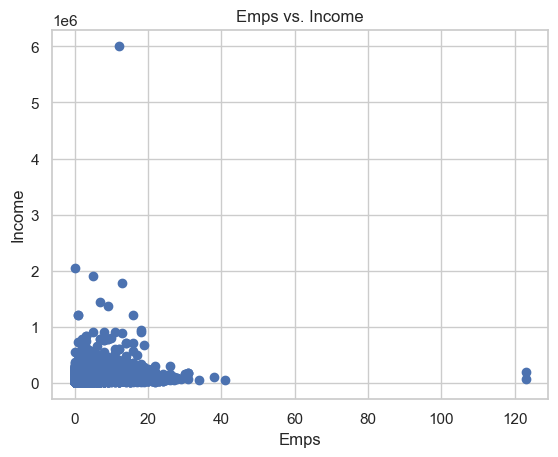

In [65]:
# your code
# Create scatter plot using two column
plt.scatter(df['person_emp_length'],df['person_income'])

# Add the title of plot
plt.title('Emps vs. Income')
#Add the x and y label
plt.xlabel('Emps')
plt.ylabel('Income')

plt.show()

__Analyzing the output__ Is there a relationship between how many years people work and how much they earn?

In [67]:
# Explain in words
# The plot shows there is no coorelation between them since it is not a line. And i also used the correlation data between person_emp_length and 'person_income is 0.13 which is really closed to 0, means there is no correlation between them.
coorelation=df['person_emp_length'].corr(df['person_income'])
coorelation                                       

0.13426792168767743

__Q20__ There are three outliers in the figure above. One individual with a very high income and two individuals with years of experience (around 120 years!).

Remove these three individuals from both lists and redo the previous plot.

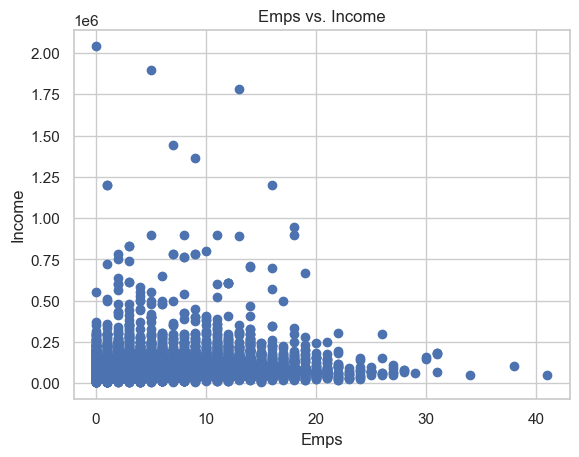

In [76]:
# your code
#Find the max income
max_income_value = df['person_income'].max()

# Keep rows where 'person_income' is less than the maximum value
normal_income = df[df['person_income'] < max_income_value]

#Keep the length is less than 120
max_experience=df[df['person_emp_length']<120]

# Merge two dateframes
df_clean = normal_income.merge(max_experience)
plt.scatter(df_clean['person_emp_length'],df_clean['person_income'])

#Add a title for plot
plt.title('Emps vs. Income')

#Add the x and y label
plt.xlabel('Emps')
plt.ylabel('Income')

plt.show()




---

Anything else? write your comments here!

---

<div style="text-align: right; color:Gray;">
    Have a great day! <br/>
    And in case I don't see you again, Happy new year!
</div>

---